#### Question: Given a plot of a story find out which genre it belongs
#### categorise a comment as spoiler or not spoiler

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
from wordcloud.wordcloud import WordCloud

In [2]:
movieDetails = pd.read_json('./IMDB_movie_details.json', lines=True)
# print(movieDetails["plot_synopsis"][0])
movieDetails.head()

,movie_id,plot_summary,duration,genre,rating,release_date,plot_synopsis
0,tt0105112,"Former CIA analyst, Jack Ryan is in England wi...",1h 57min,"[Action, Thriller]",6.9,1992-06-05,"Jack Ryan (Ford) is on a ""working vacation"" in..."
1,tt1204975,"Billy (Michael Douglas), Paddy (Robert De Niro...",1h 45min,[Comedy],6.6,2013-11-01,Four boys around the age of 10 are friends in ...
2,tt0243655,"The setting is Camp Firewood, the year 1981. I...",1h 37min,"[Comedy, Romance]",6.7,2002-04-11,
3,tt0040897,"Fred C. Dobbs and Bob Curtin, both down on the...",2h 6min,"[Adventure, Drama, Western]",8.3,1948-01-24,Fred Dobbs (Humphrey Bogart) and Bob Curtin (T...
4,tt0126886,Tracy Flick is running unopposed for this year...,1h 43min,"[Comedy, Drama, Romance]",7.3,1999-05-07,Jim McAllister (Matthew Broderick) is a much-a...


In [3]:
# movieReviews = pd.read_json('./IMDB_reviews.json', lines=True)
# movieReviews.head()

In [4]:
print("Movie shape: ",movieDetails.shape)
print("Null values: ",movieDetails.isnull().values.any())

# movieDetails[movieDetails["plot_synopsis"].notna()]
movieDetails["plot_synopsis"].notna().unique()
print(type(movieDetails["plot_synopsis"][2]))

Movie shape:  (1572, 7)
Null values:  False
<class 'str'>


# visualizing the dataset

### visual 1 -> counts per rating

Text(0.5, 1.0, 'Counts per rating')

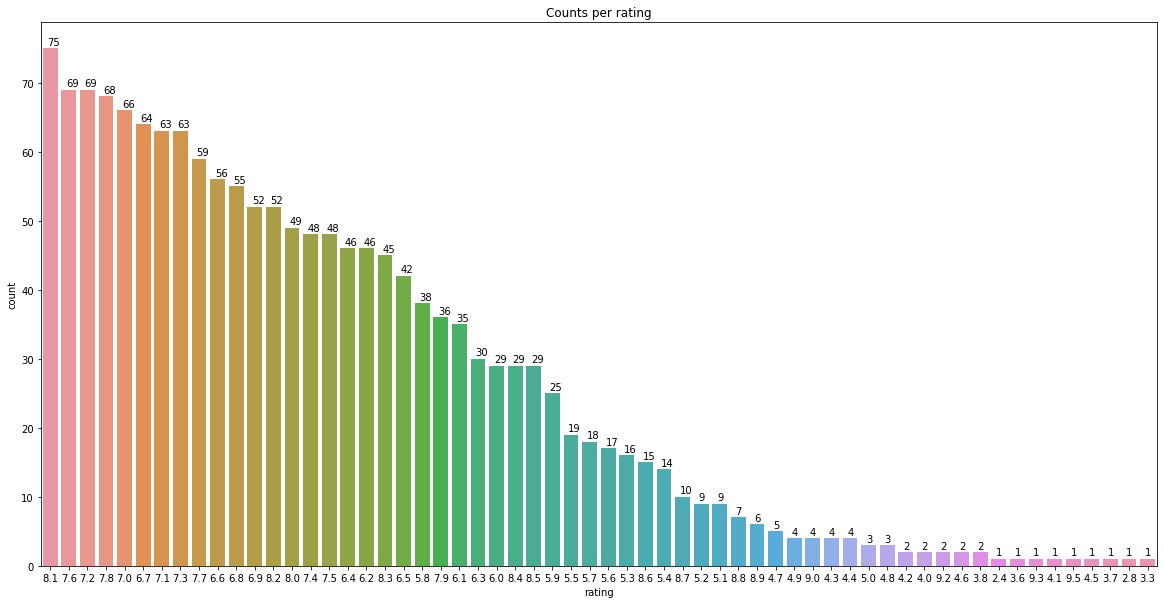

In [5]:
plt.figure(figsize=(20,10))

ax = sns.countplot(x=movieDetails["rating"],  data=movieDetails, order = movieDetails["rating"].value_counts().index )
for p, label in zip(ax.patches, movieDetails["rating"].value_counts()):
#     print(p)
#     print(label)
    ax.annotate(label, (p.get_x()+0.25, p.get_height()+0.5))
ax.set_title('Counts per rating')

In [6]:
#below shows us each movie is only mentioned once
movieDetails.groupby("movie_id").count().describe()


,plot_summary,duration,genre,rating,release_date,plot_synopsis
count,1572.0,1572.0,1572.0,1572.0,1572.0,1572.0
mean,1.0,1.0,1.0,1.0,1.0,1.0
std,0.0,0.0,0.0,0.0,0.0,0.0
min,1.0,1.0,1.0,1.0,1.0,1.0
25%,1.0,1.0,1.0,1.0,1.0,1.0
50%,1.0,1.0,1.0,1.0,1.0,1.0
75%,1.0,1.0,1.0,1.0,1.0,1.0
max,1.0,1.0,1.0,1.0,1.0,1.0


In [7]:
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

In [8]:

def remove_Stopwords(text ):
    stop_words = set(stopwords.words('english')) 
    words = word_tokenize( text.lower() ) 
    sentence = [w for w in words if not w in stop_words]
    return " ".join(sentence)
    
#lemmatization and tokenization
def lemmatize_text(text):
    wordlist=[]
    lemmatizer = WordNetLemmatizer() 
    sentences=sent_tokenize(text)
    for sentence in sentences:
        words=word_tokenize(sentence)
        for word in words:
            wordlist.append(lemmatizer.lemmatize(word))
    return ' '.join(wordlist) 

#for removing punctuations
def clean_text(text ): 
    delete_dict = {sp_character: '' for sp_character in string.punctuation} 
    delete_dict[' '] = ' ' 
    table = str.maketrans(delete_dict)
    text1 = text.translate(table)
    #print('cleaned:'+text1)
    textArr= text1.split()
    text2 = ' '.join([w for w in textArr]) 
    
    return text2.lower()

### cleaning the plot_synopsis column

In [9]:
movieDetails["plot_synopsis"] = movieDetails["plot_synopsis"].apply(clean_text)
movieDetails["plot_synopsis"] = movieDetails["plot_synopsis"].apply(remove_Stopwords)
movieDetails["plot_synopsis"] = movieDetails["plot_synopsis"].apply(lemmatize_text)
movieDetails["plot_synopsis"]

0       jack ryan ford working vacation london family ...
1       four boy around age 10 friend brooklyn 50 nick...
2                                                        
3       fred dobbs humphrey bogart bob curtin tim holt...
4       jim mcallister matthew broderick muchadmired h...
                              ...                        
1567    year 1998 evan treborn ashton kutcher suffered...
1568    brandon michael fassbender successful handsome...
1569    film alternate three different period time inv...
1570                                                     
1571                                                     
Name: plot_synopsis, Length: 1572, dtype: object

### cleaning the plot_summary column

In [10]:
movieDetails["plot_summary"] = movieDetails["plot_summary"].apply(clean_text)
movieDetails["plot_summary"] = movieDetails["plot_summary"].apply(remove_Stopwords)
movieDetails["plot_summary"] = movieDetails["plot_summary"].apply(lemmatize_text)
movieDetails["plot_summary"]

0       former cia analyst jack ryan england family va...
1       billy michael douglas paddy robert de niro arc...
2       setting camp firewood year 1981 last day every...
3       fred c dobbs bob curtin luck tampico mexico 19...
4       tracy flick running unopposed year high school...
                              ...                        
1567    evan treborn grows small town single working m...
1568    brandon 30something man living new york unable...
1569    evacuation allied soldier british empire franc...
1570    beautiful 24yearold diana bruni who happily ma...
1571    marriage david burgess senior executive beauti...
Name: plot_summary, Length: 1572, dtype: object

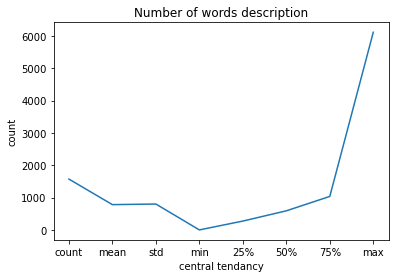

In [11]:
movieDetails['num_words'] = movieDetails['plot_synopsis'].apply(lambda x:len(str(x).split())) 

desc = movieDetails['num_words'].describe()
plt.plot(desc)
plt.title("Number of words description")
plt.xlabel("central tendancy")
plt.ylabel("count")
plt.show()


In [12]:
print(movieDetails['rating'].median())
median = movieDetails['rating'].median()

7.1


In [13]:
lower_ratings = movieDetails[movieDetails['rating'] < median]
higher_ratings = movieDetails[movieDetails['rating'] > median]
higher_ratings

,movie_id,plot_summary,duration,genre,rating,release_date,plot_synopsis,num_words
3,tt0040897,fred c dobbs bob curtin luck tampico mexico 19...,2h 6min,"[Adventure, Drama, Western]",8.3,1948-01-24,fred dobbs humphrey bogart bob curtin tim holt...,271
4,tt0126886,tracy flick running unopposed year high school...,1h 43min,"[Comedy, Drama, Romance]",7.3,1999-05-07,jim mcallister matthew broderick muchadmired h...,891
6,tt0090605,57 year ellen ripley close encounter reptilian...,2h 17min,"[Action, Adventure, Sci-Fi]",8.4,1986-07-18,opening credit see spacecraft drifting slowly ...,2749
9,tt0443453,borat sagdiyev tv reporter popular show kazakh...,1h 24min,[Comedy],7.3,2006-11-03,borat sagdiyev tv reporter popular show kazakh...,987
12,tt0450259,story following archer man tortured root stron...,2h 23min,"[Adventure, Drama, Thriller]",8.0,2006-12-08,set sierra leone civil war 1999 film show coun...,578
...,...,...,...,...,...,...,...,...
1564,tt0914798,young bruno life wealthy lifestyle prewar germ...,1h 34min,"[Drama, War]",7.8,2008-11-26,,0
1566,tt4047038,center titular holistic detective investigates...,1h,"[Comedy, Mystery, Sci-Fi]",8.4,2017-04-01,,0
1567,tt0289879,evan treborn grows small town single working m...,1h 53min,"[Sci-Fi, Thriller]",7.7,2004-01-23,year 1998 evan treborn ashton kutcher suffered...,198
1568,tt1723811,brandon 30something man living new york unable...,1h 41min,[Drama],7.2,2012-01-13,brandon michael fassbender successful handsome...,526


### Image below shows most used words with ratings above the median

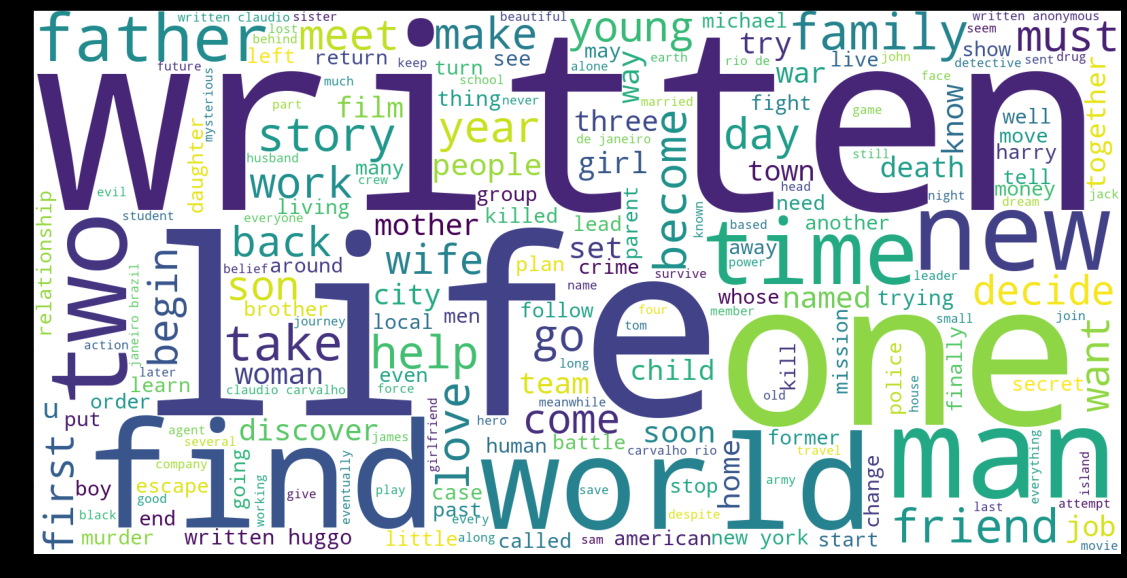

In [14]:
wordcloud = WordCloud(background_color="white",width=1600, height=800).generate(' '.join(higher_ratings['plot_summary'].tolist()))
plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)

### Image below shows most used words with ratings below the median

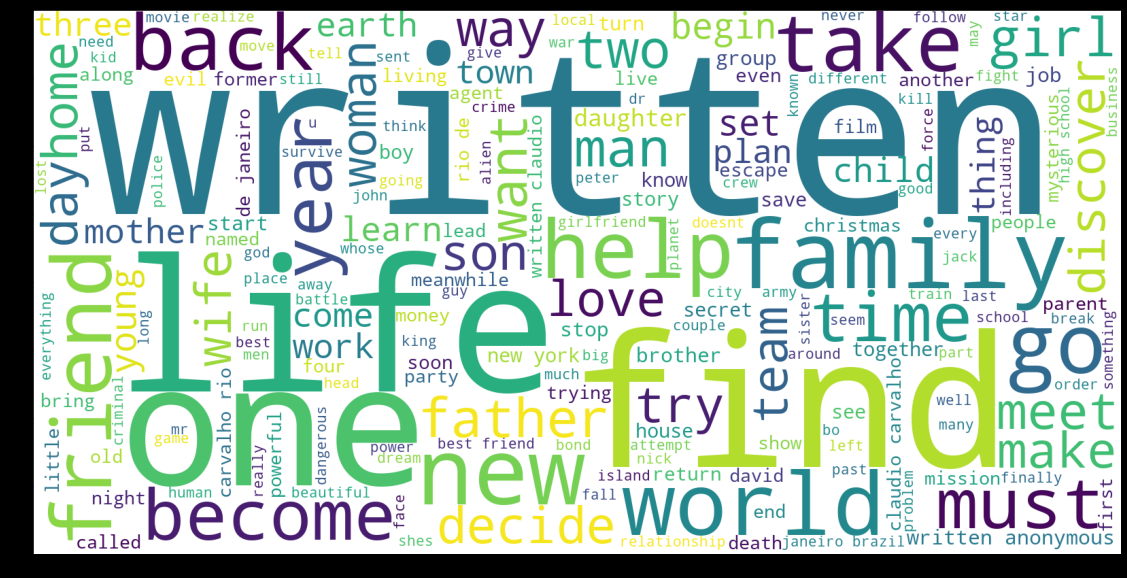

In [15]:

wordcloud = WordCloud(background_color="white",width=1600, height=800).generate(' '.join(lower_ratings['plot_summary'].tolist()))
plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)

### Image below shows most used words within the plot_synopsis column

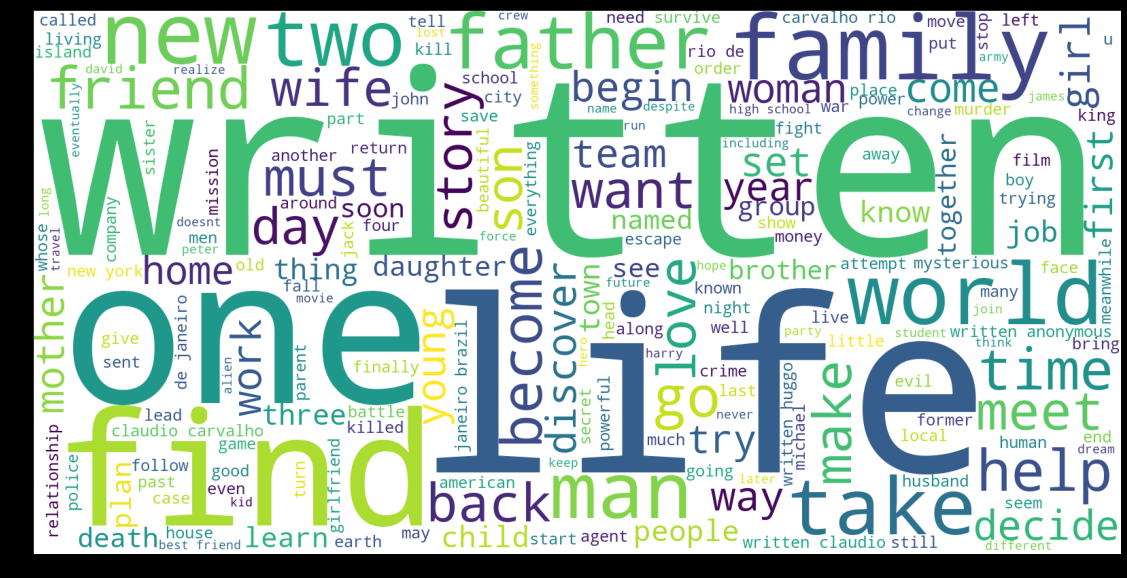

In [16]:
wordcloud = WordCloud(background_color="white",width=1600, height=800).generate(' '.join(movieDetails['plot_summary'].tolist()))
plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)

In [17]:
# the plot summary seemed to have more noun words as compared to the plot synopsis

## experimentation begins

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MultiLabelBinarizer #used for multi label classification
from sklearn.model_selection import train_test_split

#machine learning algorithms
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

#we use the below because we will be using the logistic regression and multilabel binarizer
from sklearn.multiclass import OneVsRestClassifier # will do a classification of one class vs another(multiclass/multi label strategy)

In [26]:
movieDetails.head()
print("genre type: ",type(movieDetails["genre"][0][0]))

genre type:  <class 'str'>


In [28]:
multilabel = MultiLabelBinarizer() #need to create a multilabelbinarizer object.

In [35]:
y = multilabel.fit_transform(movieDetails["genre"])
# pd.DataFrame(y)
print("Document Term matrix of the genres")
pd.DataFrame(y,columns=multilabel.classes_) #multilabel classifiers expect such

Document Term matrix of the genres


,Action,Adventure,Animation,Biography,Comedy,Crime,Drama,Family,Fantasy,Film-Noir,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1567,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1568,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1569,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1570,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
print("No of classes: {} i.e {} ".format(len(multilabel.classes_), multilabel.classes_))

No of classes: 21 i.e ['Action' 'Adventure' 'Animation' 'Biography' 'Comedy' 'Crime' 'Drama'
 'Family' 'Fantasy' 'Film-Noir' 'History' 'Horror' 'Music' 'Musical'
 'Mystery' 'Romance' 'Sci-Fi' 'Sport' 'Thriller' 'War' 'Western'] 


In [39]:
# TfidfVectorizer -> term frequency multiplication with inverse document frequency
tfidf = TfidfVectorizer(analyzer="word",max_features=5000, ngram_range=(1,1), stop_words="english")#if word is selected, tokenization will be done word by word, if char is selected ....
sum_tfidf = tfidf.fit_transform(movieDetails["plot_summary"]).toarray()
print("plot_summary TFIDF")
pd.DataFrame(sum_tfidf)

plot_summary TFIDF


,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1568,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1569,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1570,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
# TfidfVectorizer -> term frequency multiplication with inverse document frequency
tfidf = TfidfVectorizer(analyzer="word",max_features=5000, ngram_range=(1,1), stop_words="english")#if word is selected, tokenization will be done word by word, if char is selected ....
syn_tfidf = tfidf.fit_transform(movieDetails["plot_synopsis"]).toarray()
print("plot_synopsis TFIDF")
pd.DataFrame(syn_tfidf)

plot_synopsis TFIDF


,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.019093,0.0,0.0,0.0,0.0,0.0,0.0,0.026325,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1567,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1568,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1569,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1570,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
x = sum_tfidf 
# x = syn_tfidf

In [46]:
tfidf.vocabulary_ #the features it has learned -_ this shows us what has been tokenized 


{'jack': 2376,
 'ryan': 3892,
 'ford': 1792,
 'working': 4943,
 'vacation': 4750,
 'london': 2709,
 'family': 1665,
 'retired': 3760,
 'cia': 831,
 'professor': 3495,
 'academy': 35,
 'seen': 3990,
 'delivering': 1207,
 'lecture': 2616,
 'royal': 3871,
 'wife': 4903,
 'daughter': 1155,
 'sally': 3909,
 'near': 3064,
 'palace': 3233,
 'come': 917,
 'british': 585,
 'guard': 2008,
 'try': 4683,
 'react': 3620,
 'tap': 4467,
 'dance': 1134,
 'shes': 4067,
 'impressed': 2257,
 'trained': 4634,
 'ignore': 2233,
 'distraction': 1332,
 'doesnt': 1351,
 'walk': 4831,
 'away': 345,
 'en': 1514,
 'route': 3867,
 'rendezvous': 3714,
 'stolen': 4312,
 'cab': 640,
 'sit': 4137,
 'army': 248,
 'terrorist': 4519,
 'kevin': 2506,
 'driver': 1401,
 'sean': 3969,
 'miller': 2934,
 'bean': 408,
 'younger': 4984,
 'brother': 592,
 'patrick': 3275,
 'loading': 2691,
 'bullet': 610,
 'gun': 2017,
 'prepare': 3450,
 'carry': 709,
 'scheduled': 3947,
 'ambush': 164,
 'lord': 2719,
 'william': 4906,
 'holmes':

In [47]:
print(x.shape, y.shape)


(1572, 5000) (1572, 21)


In [48]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)#X is feature, y is target,stratify will make sure we divide an equal ratio in train and test data sample

In [51]:
sgd = SGDClassifier()#stochastic gradient descent algorithm
lr = LogisticRegression(solver="lbfgs") #the lbfgs is the algorithm to use in the optimization problem(for multiclass problems)
svc = LinearSVC()

In [52]:
def j_score(y_true,y_pred): #to help us know how the model is performing
    jaccard = np.minimum(y_true,y_pred).sum(axis=1)/np.maximum(y_true,y_pred).sum(axis=1)
    return jaccard.mean()*100

def print_score(y_pred,clf):
    print("clf: ",clf.__class__.__name__)
    print("Jaccard Score: {}".format(j_score(y_test,y_pred)))
    print("-----------------------------------------")

In [53]:
for classifier in [sgd,lr,svc]:
    clf = OneVsRestClassifier(classifier) #out of the 20 classes it will select 1 at a time and the other 19 as all other classes and will do the same for every data 
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    print("y_pred:{}".format(y_pred))
    print_score(y_pred,classifier)

y_pred:[[0 0 0 ... 0 0 0]
 [1 1 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
clf:  SGDClassifier
Jaccard Score: 38.37037037037037
-----------------------------------------
y_pred:[[0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
clf:  LogisticRegression
Jaccard Score: 21.21693121693122
-----------------------------------------
y_pred:[[0 0 0 ... 0 0 0]
 [1 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
clf:  LinearSVC
Jaccard Score: 34.48148148148149
-----------------------------------------


In [55]:
for classifier in [sgd]:
    clf = OneVsRestClassifier(classifier) #out of the 20 classes it will select 1 at a time and the other 19 as all other classes and will do the same for every data 
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    print("y_pred:{}".format(y_pred))
    print_score(y_pred,classifier)

y_pred:[[0 0 0 ... 0 0 0]
 [1 1 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
clf:  SGDClassifier
Jaccard Score: 35.36507936507937
-----------------------------------------


In [54]:
x = ["'Elite' presents three young people who have received a scholarship to study in Las Encinas, the most prestigious institute in Spain, after the collapse suffered by the public center in which they studied. However, their arrival in Las Encinas will not be easy, and the students, belonging to the upper class, will not welcome the arrival of Samuel, Nadia and Christian, who will turn upside down, without them wanting it, life of their schoolmates."]

In [58]:
xt = tfidf.transform(x)
xt
# pd.DataFrame(xt)

<1x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 22 stored elements in Compressed Sparse Row format>

In [59]:
arr = clf.predict(xt)
pd.DataFrame(arr,columns=multilabel.classes_)

,Action,Adventure,Animation,Biography,Comedy,Crime,Drama,Family,Fantasy,Film-Noir,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
